<a href="https://www.kaggle.com/code/tasnimniger/web-scraping-reddit-with-python?scriptVersionId=157603021" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Web Scraping Reddit with Python

**PRAW** is a Python library that simplifies interaction with Reddit's API. It allows developers to access Reddit’s data, submit content, and manage user accounts using Python code.

In [ ]:
#install praw 
!pip install praw

In [ ]:
import praw
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

Before begin collecting data, must install the Natural Language Toolkit (NLTK) Python package.
When scrapping Reddit data, I am using the polarity score method of the VADER sentiment analyzer. So, need to download 'vader_lexicon' package.

In [ ]:
import nltk
nltk.download('vader_lexicon')

To get started with `praw`, We need to create a Reddit app and obtain your Client ID and Client Secret.

# Making a Reddit app

Simply follow these steps:

1. Log into your account
2. Navigate to https://www.reddit.com/prefs/apps/
3. Click on the button that says "are you a developer? create an app..."

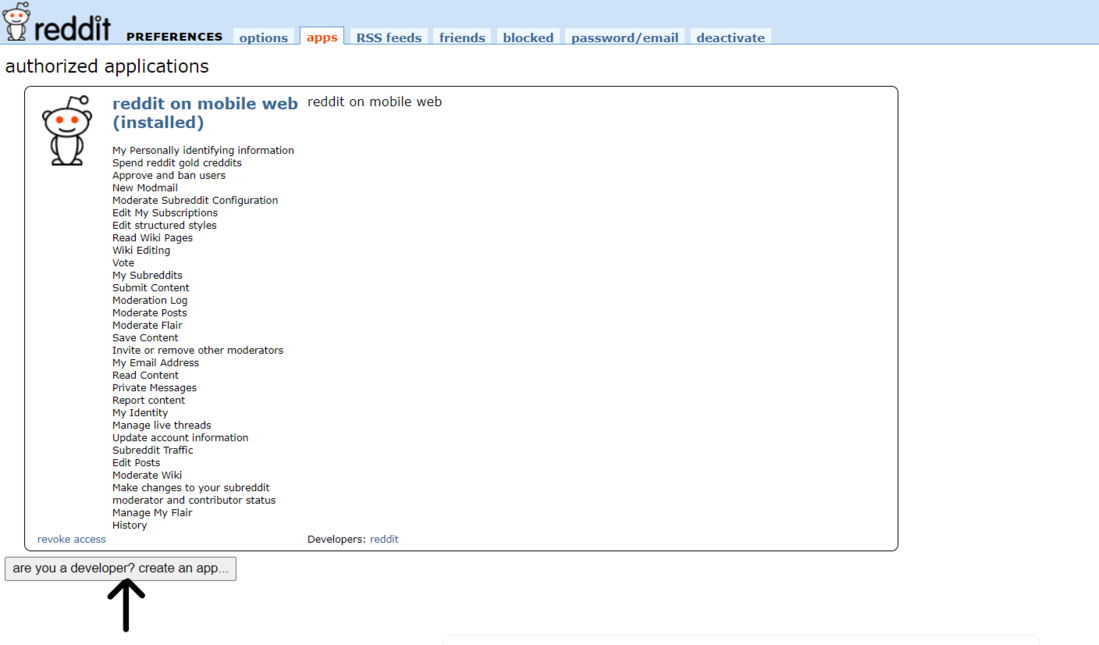

A form like this will show up on your screen. 
* Enter the name 
* Select Script and description of your choice. 
* In the redirect uri box, enter http://localhost:8080

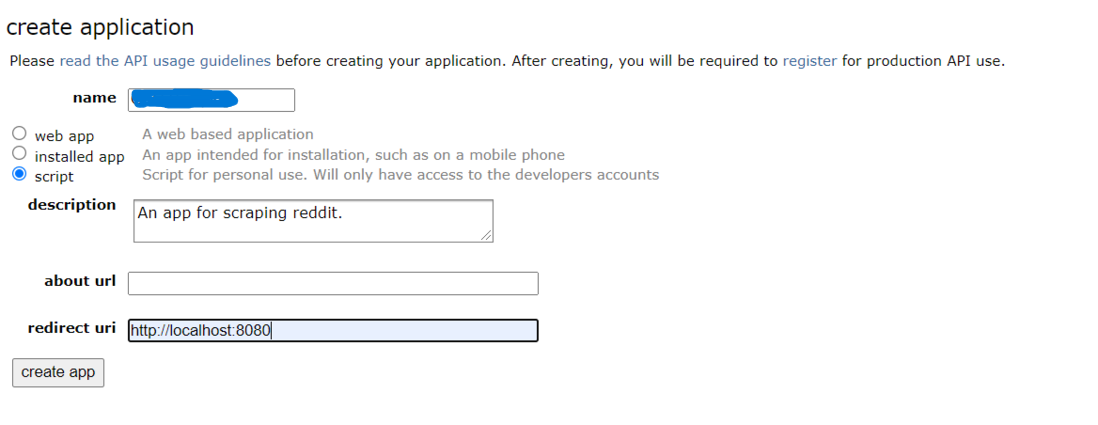

After entering the details, click on “create app”.

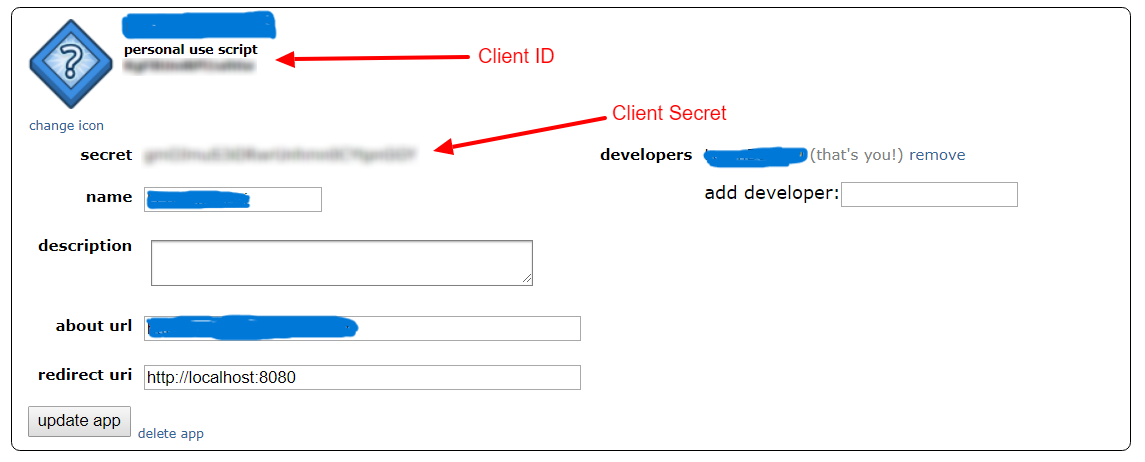

The Reddit app has been created. Now, note down the client_id, secret, and user_agent values. These values will be used to connect to Reddit using python. Next, replace your details in the following lines (without carets < >).

In [ ]:
reddit= praw.Reddit(
    client_id="<client_id>",
    client_secret="<client_secret>",
    user_agent="<name>"
)

In [ ]:
# Now define a set for headlines not to get duplicates when running multiple times
headlines=set()

# iterate through the /r/time subreddit using the API client:
for sub in reddit.subreddit('time').hot(limit=None):
    headlines.add(sub.title)

In [ ]:
print(headlines)

In [ ]:
df=pd.DataFrame(headlines)
df.head()

In [ ]:
#Exporting Data to a CSV File:
df.to_csv('time.csv',header=False, encoding='utf-8', index=False)

# Labeling the  Data

NLTK’s built-in Vader Sentiment Analyzer will simply rank a piece of text as positive, negative or neutral using a lexicon of positive and negative words.

Utilize this tool by first creating a Sentiment Intensity Analyzer (SIA) to categorize headlines, then use the polarity_scores method to get the sentiment.

Next append each sentiment dictionary to a results list, which will transform into a dataframe:

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia=SIA()
results=[]

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)
    
pprint(results[:3], width=100)

In [ ]:
df=pd.DataFrame.from_records(results)
df.head()

In [ ]:
df['label']='neutral'
df.loc[df['compound'] > 0.2, 'label'] = 'positive'
df.loc[df['compound'] < -0.2, 'label'] = 'negative'
df.head()

This dataframe consists of four columns from the sentiment scoring: Neu, Neg, Pos and compound. The first three represent the sentiment score percentage of each category in our headline, and the compound single number that scores the sentiment. `compound` ranges from -1 (Extremely Negative) to 1 (Extremely Positive).

Here, I am considering posts with a compound value greater than 0.2 as positive and less than -0.2 as negative.

In [ ]:
df2 = df[['headline','label']]

In [ ]:
#Only keep positive and negative sentiment data
df2=df2[df2.label != 'neutral']

In [ ]:
#Exporting Data to a CSV File:
df2.to_csv('time.csv' , encoding='utf-8' , index=False)

In [ ]:
# raw value counts of the labels
df2.label.value_counts()

In [ ]:
#provides percentages with the normalize keyword
df2.label.value_counts(normalize=True) * 100

# Plot a Bar chart

In [ ]:
fig, ax= plt.subplots(figsize=(8,8))
counts=df.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()